## Assignment III

----------------------------------------------------------------
Author : $BALU$ $NIRANJAN$      
Roll No: $21229$    
Date   : September 14, 2022    

----------------------------------------------------------------

### Importing Required Libraries: 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py
from seaborn_qqplot import pplot

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Reading the Dataset

In [2]:
df = pd.read_csv('D:\\ACADEMICS\\301_MACHINE LEARNING\\Datasets\\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### Inference:
    
    - No null values are present in the dataset.

In [6]:
df.drop(columns = ['Id'], axis = 1, inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### Inferences:

    - Dataset has 150 rows, 5 columns
    - 4 numerical variables
    - 1 categorical variable( Target)

# DATA VISUALIZATION


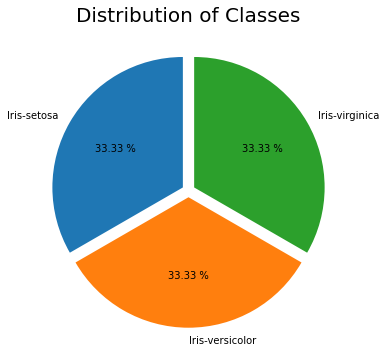

In [7]:
plt.figure(figsize = (6, 6))

count_list = [(df.Species == 'Iris-setosa').sum(), (df.Species == 'Iris-versicolor').sum(), (df.Species == 'Iris-virginica').sum()]
label_list = list(df['Species'].unique())

plt.pie(count_list,
        labels = label_list,
        autopct = "%.2f %%",
        startangle = 90,
        explode = (0.05, 0.05, 0.05))

plt.title('Distribution of Classes', fontsize = 20)
plt.show()

##### Inference:
       
    - The Distribution of the classes are EQUAL.

### HISTOGRAMS

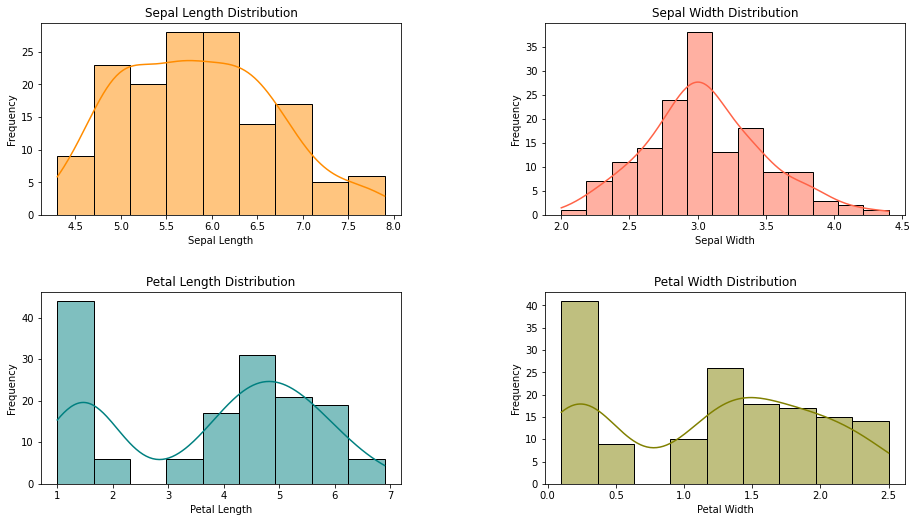

In [8]:
plt.figure(figsize=(15, 8))

plt.subplot(2,2,1)

sns.histplot(x='SepalLengthCm', data=df, kde=True, color = 'darkorange')
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')

plt.subplot(2,2,2)

sns.histplot(x='SepalWidthCm', data=df, kde=True, color = 'tomato')
plt.title('Sepal Width Distribution')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')

plt.subplot(2,2,3)

sns.histplot(x='PetalLengthCm', data=df, kde=True, color = 'teal')
plt.title('Petal Length Distribution')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
sns.histplot(x='PetalWidthCm', data=df, kde=True, color = 'olive')
plt.title('Petal Width Distribution')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

##### Inferences:

    - Sepal Length, Petal Length, Petal Width are not Normally Distributed.
    - Sepal Width looks like it is following Normal Distribution.

In [9]:
shapiro(df['SepalWidthCm'])

ShapiroResult(statistic=0.9837920665740967, pvalue=0.07518772780895233)

##### SHAPIRO TEST RESULTS : 
   
       - The p-value from the shapiro test is > 0.05.
       - Thus the null hypothesis cannot be rejected.
       - We do not have sufficient evidence to say that sample does not come from a normal distribution.

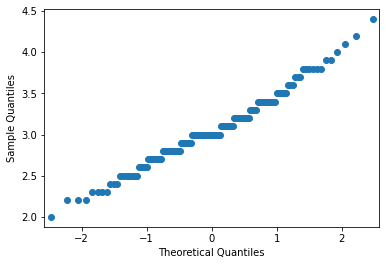

In [10]:
sm.qqplot(df['SepalWidthCm'], line =None)
plt.show()

##### Inference:

    - Sepal Width is Normally Distributed.

### SCATTERPLOT


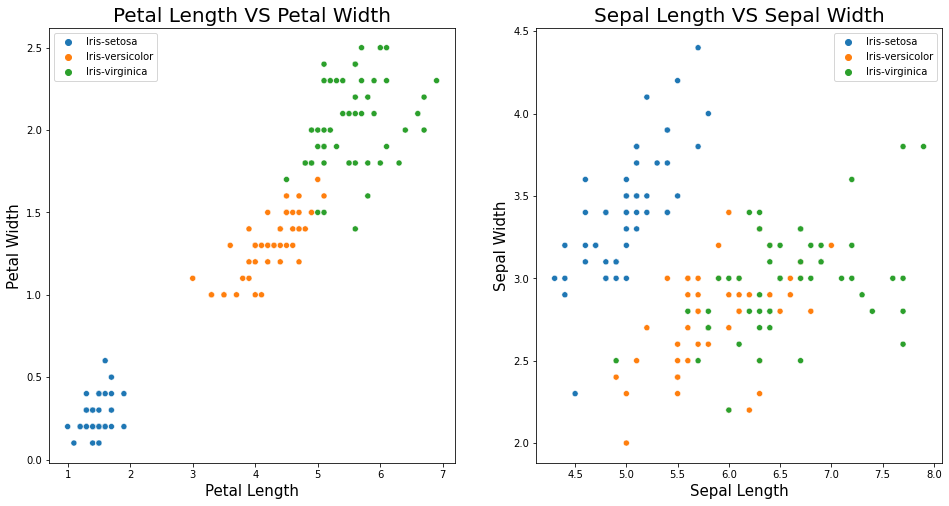

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)

sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = df)
plt.legend()
plt.title('Petal Length VS Petal Width', fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)

plt.subplot(1,2,2)

sns.scatterplot(x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = df)
plt.legend()
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### BOXPLOT

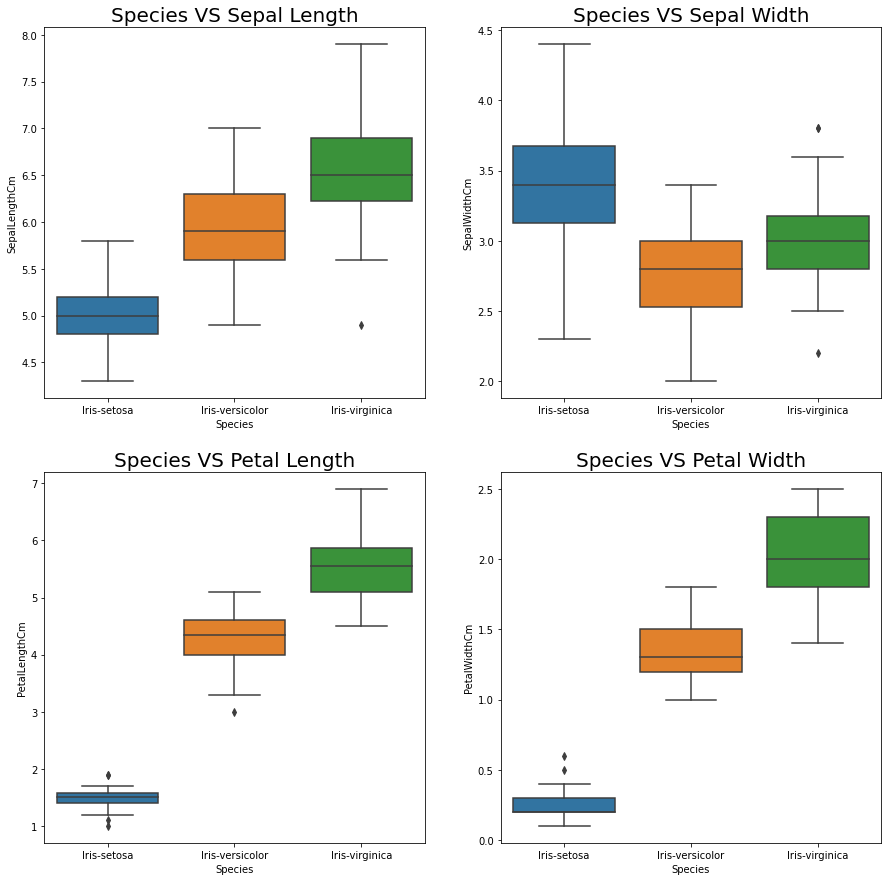

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(15, 15))

plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'Species', y = 'SepalLengthCm')
plt.title('Species VS Sepal Length', fontsize = 20)

plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'Species', y = 'SepalWidthCm')
plt.title('Species VS Sepal Width', fontsize = 20)

plt.subplot(2,2,3)
sns.boxplot(data = df, x = 'Species', y = 'PetalLengthCm')
plt.title('Species VS Petal Length', fontsize = 20)

plt.subplot(2,2,4)
sns.boxplot(data = df, x = 'Species', y = 'PetalWidthCm')
plt.title('Species VS Petal Width', fontsize = 20)

plt.show()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

##### Inference:

    - There are outliers present.

### PAIRPLOT

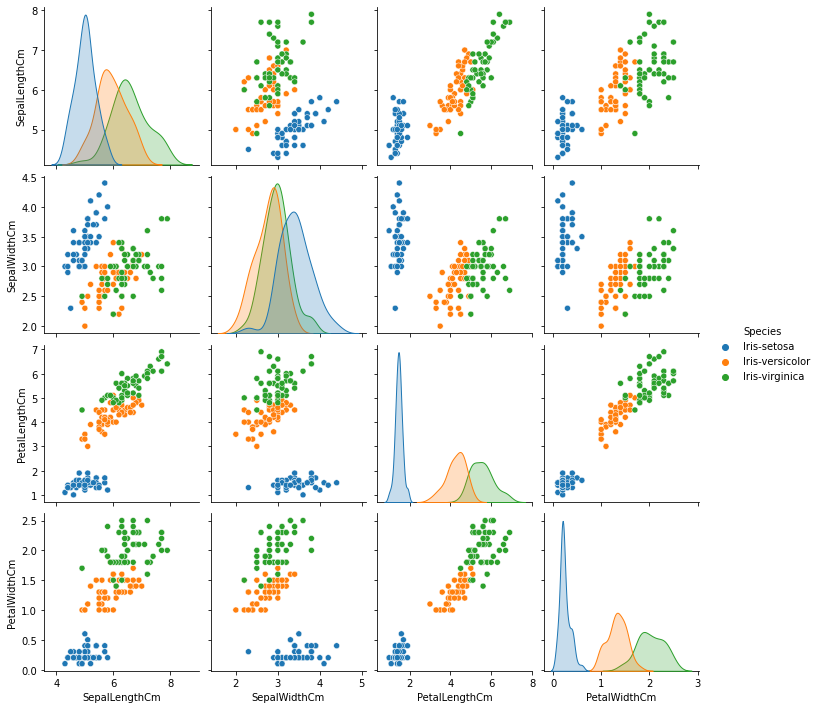

In [13]:
sns.pairplot(df, hue = 'Species', height = 2.5)
plt.show()

### FEATURE ENGINEERING

In [14]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
df['Species']= LabelEncoder().fit_transform(df['Species'])
df['Species'].unique()

array([0, 1, 2])

### FEATURE SCALING

In [16]:
scaler = StandardScaler()
scaler.fit(df[['SepalLengthCm']])
df['SepalLengthCm'] = scaler.transform(df[['SepalLengthCm']])

scaler.fit(df[['SepalWidthCm']])
df['SepalWidthCm'] = scaler.transform(df[['SepalWidthCm']])

scaler.fit(df[['PetalLengthCm']])
df['PetalLengthCm'] = scaler.transform(df[['PetalLengthCm']])

scaler.fit(df[['PetalWidthCm']])
df['PetalWidthCm'] = scaler.transform(df[['PetalWidthCm']])

df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


### CORRELATIONS

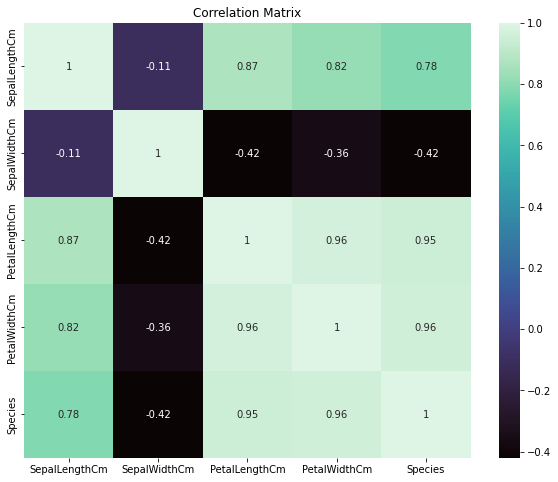

In [17]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlations,cmap ='mako' , annot=True)
plt.title("Correlation Matrix")
plt.show()

##### Inferences:

    - PetalWidthCm and PetalLengthCm are highly corrleated.
    - PetalLengthCm and Species are highly correlated.
    - SepalLengthCm and PetalLengthCm are highly correlated.

### MODEL IMPLEMENTATION

### Logistic Regression

In [18]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df.Species

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 0)

The accuracy for Logistic Regression is: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

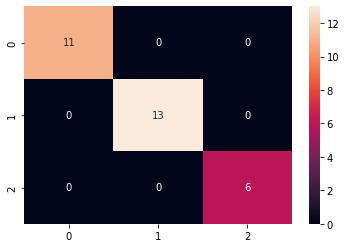

In [19]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
y_pred = lr.predict(Xtest)
acc_lr = lr.score(Xtest, ytest)

print("The accuracy for Logistic Regression is:", acc_lr * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

cm_model = confusion_matrix(ytest, y_pred)
sns.heatmap(cm_model, annot = True)

### k Nearest Neighbour

The accuracy for k Nearest Neighbours is: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

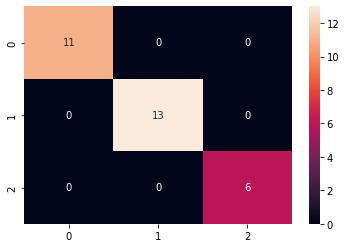

In [20]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(Xtrain, ytrain)
y_pred = knn.predict(Xtest)
acc_knn = knn.score(Xtest, ytest)

print("The accuracy for k Nearest Neighbours is:", acc_knn * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

cm_model = confusion_matrix(ytest, y_pred)
sns.heatmap(cm_model, annot = True)

### Gaussian Naive Bayes

The accuracy for Naive Bayes is: 96.66666666666667 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

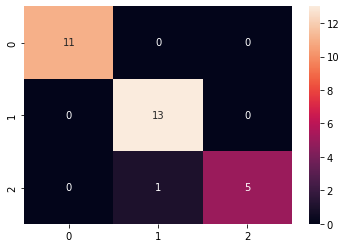

In [21]:
NB = GaussianNB() 
NB.fit(Xtrain,ytrain.ravel())  
y_pred = NB.predict(Xtest) 
acc_NB = NB.score(Xtest, ytest)

print("The accuracy for Naive Bayes is:", acc_NB * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

NB = confusion_matrix(ytest, y_pred)
sns.heatmap(NB, annot = True)

### Support Vector Machines

#### kernel - linear

The accuracy for Support Vector Classifier is: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

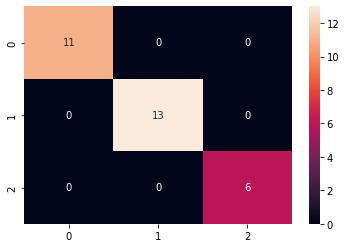

In [22]:
svc_model = SVC(kernel='linear')
svc_model.fit(Xtrain, ytrain)
y_pred = svc_model.predict(Xtest) 
acc_SVC = svc_model.score(Xtest, ytest)

print("The accuracy for Support Vector Classifier is:", acc_SVC * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

NB = confusion_matrix(ytest, y_pred)
sns.heatmap(NB, annot = True)

#### kernel - rbf

The accuracy for Support Vector Classifier is: 100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

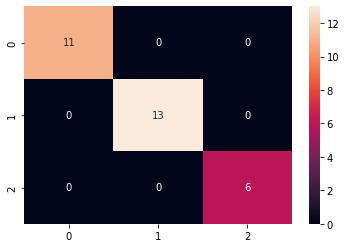

In [23]:
svc_model = SVC(kernel='rbf')
svc_model.fit(Xtrain, ytrain)
y_pred = svc_model.predict(Xtest) 
acc_SVC = svc_model.score(Xtest, ytest)

print("The accuracy for Support Vector Classifier is:", acc_SVC * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

NB = confusion_matrix(ytest, y_pred)
sns.heatmap(NB, annot = True)

#### kernel - poly

The accuracy for Support Vector Classifier is: 90.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.81      1.00      0.90        13
           2       1.00      0.50      0.67         6

    accuracy                           0.90        30
   macro avg       0.94      0.83      0.85        30
weighted avg       0.92      0.90      0.89        30



<AxesSubplot:>

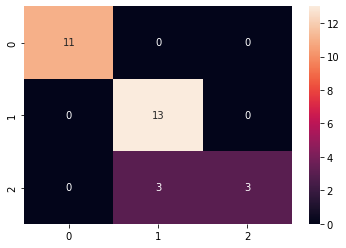

In [24]:
svc_model = SVC(kernel='poly')
svc_model.fit(Xtrain, ytrain)
y_pred = svc_model.predict(Xtest) 
acc_SVC = svc_model.score(Xtest, ytest)

print("The accuracy for Support Vector Classifier is:", acc_SVC * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

NB = confusion_matrix(ytest, y_pred)
sns.heatmap(NB, annot = True)

#### kernel - sigmoid

The accuracy for Support Vector Classifier is: 83.33333333333334 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.62      0.76        13
           2       0.55      1.00      0.71         6

    accuracy                           0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



<AxesSubplot:>

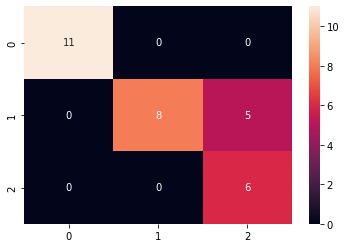

In [25]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(Xtrain, ytrain)
y_pred = svc_model.predict(Xtest) 
acc_SVC = svc_model.score(Xtest, ytest)

print("The accuracy for Support Vector Classifier is:", acc_SVC * 100, "%\n")

cl_rep = classification_report(ytest, y_pred)
print(cl_rep)

NB = confusion_matrix(ytest, y_pred)
sns.heatmap(NB, annot = True)

##### Inferences:

    The accuracy of all the different model implementations.

  $Logistic$ $Regression$ $:$ $100%$ $\%$    
  $k$ $Nearest$ $Neighbours$ $:$ $100%$ $\%$     
  $Naive$ $Bayes$ $Algorithm$ $:$ $96.67%$ $\%$              
  $Support$ $Vector$ $Classifiers$ $kernel$ $-$ $linear$ $:$ $100%$ $\%$     
  $Support$ $Vector$ $Classifiers$ $kernel$ $-$ $rbf$ $:$ $100%$ $\%$     
  $Support$ $Vector$ $Classifiers$ $kernel$ $-$ $poly$ $:$ $90%$ $\%$     
  $Support$ $Vector$ $Classifiers$ $kernel$ $-$ $sigmoid$ $:$ $83.33%$ $\%$      